In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# MAE MSE

In [8]:
sthsl_mae = np.zeros(77)
sthsl_mse = np.zeros(77)

for comm in range(1, 78):

    if comm in [23, 76]:
        sthsl_mae[comm - 1] = -1
        sthsl_mse[comm - 1] = -1
        continue

   # reading the data from the file
    with open("Results_AIST_CATS/Comm_" + str(comm) + ".txt") as f:
        data = f.read()
        data = data.replace("'", '"')
        data = data.replace("nan", "-1")
        
        # converting the string representation of list to list
        data = json.loads(data)
        sthsl_mae[comm - 1] = data["MAE"]
        sthsl_mse[comm - 1] = data["RMSE"] * data["RMSE"]

print(len(sthsl_mae))
print(len(sthsl_mse))

77
77


In [5]:
# save the mae and mse of sthsl
with open("sthsl_mae_aist_cats.pkl", "wb") as f:
    pickle.dump(sthsl_mae, f)
    
with open("sthsl_mse_aist_cats.pkl", "wb") as f:
    pickle.dump(sthsl_mse, f)

# Analysis

In [4]:
sthsl_mae = pickle.load(open("sthsl_mae_aist_cats.pkl", "rb"))
sthsl_mse = pickle.load(open("sthsl_mse_aist_cats.pkl", "rb"))

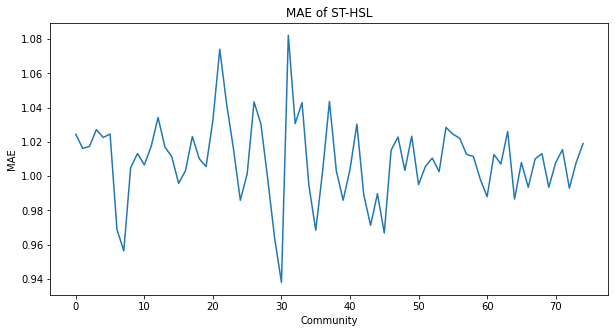

In [6]:
# exclude the entry with -1
temp_sthsl_mae = sthsl_mae[sthsl_mae != -1]

# plot the mse
plt.figure(figsize=(10, 5))
plt.plot(temp_sthsl_mae)
plt.xlabel("Community")
plt.ylabel("MAE")
plt.title("MAE of ST-HSL")
# plt.savefig("sthsl_mse_aist_cats.png")
plt.show()

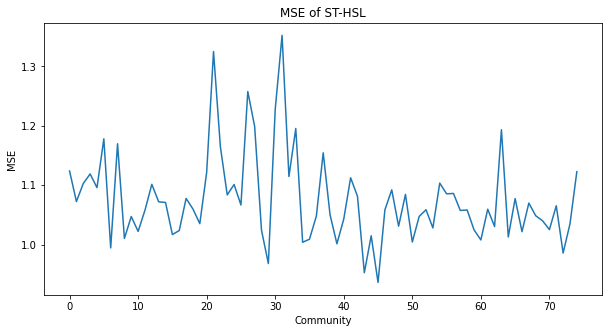

In [7]:
# exclude the entry with -1
temp_sthsl_mse = sthsl_mse[sthsl_mse != -1]

# plot the mse
plt.figure(figsize=(10, 5))
plt.plot(temp_sthsl_mse)
plt.xlabel("Community")
plt.ylabel("MSE")
plt.title("MSE of ST-HSL")
# plt.savefig("sthsl_mse_aist_cats.png")
plt.show()

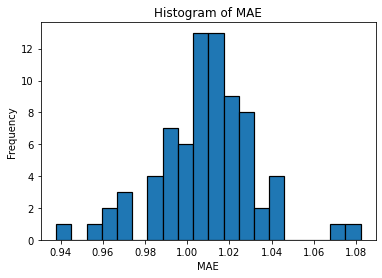

In [8]:
with open("Analysis ST-HSL_MAE.txt", "w") as f:
    f.write("Min: " + str(np.min(temp_sthsl_mae)) + "\n")
    f.write("Max: " + str(np.max(temp_sthsl_mae)) + "\n")
    f.write("Mean: " + str(np.mean(temp_sthsl_mae)) + "\n")
    f.write("Variance: " + str(np.var(temp_sthsl_mae)) + "\n")

# plot histogram
plt.hist(temp_sthsl_mae, bins=20, edgecolor="black", linewidth=1.2)
plt.title("Histogram of MAE")
plt.xlabel("MAE")
plt.ylabel("Frequency")
plt.savefig("ST-HSL MAE Histogram.jpg", bbox_inches="tight")
plt.show()

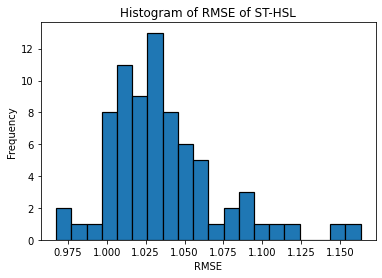

In [9]:
with open("Analysis ST-HSL_RMSE.txt", "w") as f:
    f.write("Min: " + str(np.min(temp_sthsl_mse**0.5)) + "\n")
    f.write("Max: " + str(np.max(temp_sthsl_mse**0.5)) + "\n")
    f.write("Mean: " + str(np.mean(temp_sthsl_mse**0.5)) + "\n")
    f.write("Variance: " + str(np.var(temp_sthsl_mse**0.5)) + "\n")

# plot histogram of mse
plt.hist(temp_sthsl_mse**0.5, bins=20, edgecolor='black', linewidth=1.2)
plt.title("Histogram of RMSE of ST-HSL")
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.savefig("RMSE Hisogram of ST-HSL.jpg", bbox_inches='tight')
plt.show()